In [1]:
#import related libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
df=pd.read_csv(r"C:\Users\HP\Downloads\regenerated_retail_sales_data.csv")


In [3]:
#dimensions
df.shape

(1500, 12)

In [4]:
#Show first five row of data
df.head()

,InvoiceID,CustomerID,Gender,Age,ProductCategory,ProductID,Quantity,PricePerUnit,PurchaseDate,StoreLocation,PaymentMethod,TotalPrice
0,INV1000,108,Female,45,Electronics,1041,5,41.27,12-06-2023,Phoenix,Cash,206.35
1,INV1001,124,Female,63,Toys,1057,5,356.31,24-02-2023,Houston,Debit Card,1781.55
2,INV1002,167,Female,53,Grocery,1058,3,400.49,04-09-2023,Los Angeles,Debit Card,1201.47
3,INV1003,203,Female,53,Electronics,1095,5,244.44,13-11-2023,Chicago,Credit Card,1222.20
4,INV1004,187,Male,61,Electronics,1003,7,795.58,09-02-2023,Los Angeles,Debit Card,5569.06


In [5]:
df.tail()

,InvoiceID,CustomerID,Gender,Age,ProductCategory,ProductID,Quantity,PricePerUnit,PurchaseDate,StoreLocation,PaymentMethod,TotalPrice
1495,INV2495,167,Female,19,Furniture,1003,4,705.60,08-07-2023,Chicago,Cash,2822.40
1496,INV2496,223,Female,56,Clothing,1085,1,558.72,26-12-2023,Chicago,Mobile Payment,558.72
1497,INV2497,282,Male,59,Toys,1028,5,64.38,10-01-2023,Houston,Credit Card,321.90
1498,INV2498,139,Male,54,Grocery,1066,6,329.68,28-02-2023,New York,Debit Card,1978.08
1499,INV2499,265,Female,29,Electronics,1031,3,161.53,01-03-2023,Chicago,Credit Card,484.59


In [6]:
#Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   InvoiceID        1500 non-null   object 
 1   CustomerID       1500 non-null   int64  
 2   Gender           1500 non-null   object 
 3   Age              1500 non-null   int64  
 4   ProductCategory  1500 non-null   object 
 5   ProductID        1500 non-null   int64  
 6   Quantity         1500 non-null   int64  
 7   PricePerUnit     1500 non-null   float64
 8   PurchaseDate     1500 non-null   object 
 9   StoreLocation    1500 non-null   object 
 10  PaymentMethod    1500 non-null   object 
 11  TotalPrice       1500 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 140.8+ KB


In [7]:
#finding null values
df.isnull().sum()

InvoiceID          0
CustomerID         0
Gender             0
Age                0
ProductCategory    0
ProductID          0
Quantity           0
PricePerUnit       0
PurchaseDate       0
StoreLocation      0
PaymentMethod      0
TotalPrice         0
dtype: int64

In [8]:
#finding duplicates
df.duplicated().sum()

0

In [9]:
df.describe()

,CustomerID,Age,ProductID,Quantity,PricePerUnit,TotalPrice
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,199.563333,41.070000,1049.494000,3.994667,404.809533,1627.914120
std,57.024572,13.508173,28.855151,1.710533,226.154674,1217.507843
min,100.000000,18.000000,1000.000000,1.000000,11.880000,18.450000
25%,151.000000,29.000000,1026.000000,3.000000,213.160000,669.352500
50%,198.000000,41.000000,1049.000000,4.000000,403.350000,1393.245000
75%,248.000000,53.000000,1075.000000,5.000000,596.260000,2243.340000
max,299.000000,64.000000,1099.000000,10.000000,799.740000,7828.400000


In [10]:
df.nunique()

InvoiceID          1500
CustomerID          200
Gender                2
Age                  47
ProductCategory       5
ProductID           100
Quantity             10
PricePerUnit       1487
PurchaseDate        356
StoreLocation         5
PaymentMethod         4
TotalPrice         1495
dtype: int64

In [11]:
df.columns

Index(['InvoiceID', 'CustomerID', 'Gender', 'Age', 'ProductCategory',
       'ProductID', 'Quantity', 'PricePerUnit', 'PurchaseDate',
       'StoreLocation', 'PaymentMethod', 'TotalPrice'],
      dtype='object')

In [12]:
#converting object to date type
df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'],format='%d-%m-%Y')

In [13]:
monthly_purchase=df.groupby(df['PurchaseDate'].dt.to_period("M"))["TotalPrice"].sum()
monthly_purchase

PurchaseDate
2023-01    214597.42
2023-02    185247.84
2023-03    184543.52
2023-04    223073.48
2023-05    193764.35
2023-06    158766.21
2023-07    227188.26
2023-08    242371.94
2023-09    182097.77
2023-10    223316.67
2023-11    214658.87
2023-12    192244.85
Freq: M, Name: TotalPrice, dtype: float64

In [14]:
df.dtypes

InvoiceID                  object
CustomerID                  int64
Gender                     object
Age                         int64
ProductCategory            object
ProductID                   int64
Quantity                    int64
PricePerUnit              float64
PurchaseDate       datetime64[ns]
StoreLocation              object
PaymentMethod              object
TotalPrice                float64
dtype: object

In [15]:
# Create Age Groups
df["AgeGroup"] = pd.cut(df["Age"], bins=[18, 24, 35, 44, 54, 64, 74],
                         labels=["18-24", "25-35", "36-44", "45-54", "55-64", "65-74"])

In [16]:
age_spending = df.groupby("AgeGroup")["TotalPrice"].sum() 
age_spending

AgeGroup
18-24    305301.56
25-35    571349.96
36-44    469028.42
45-54    538164.88
55-64    521885.38
65-74         0.00
Name: TotalPrice, dtype: float64

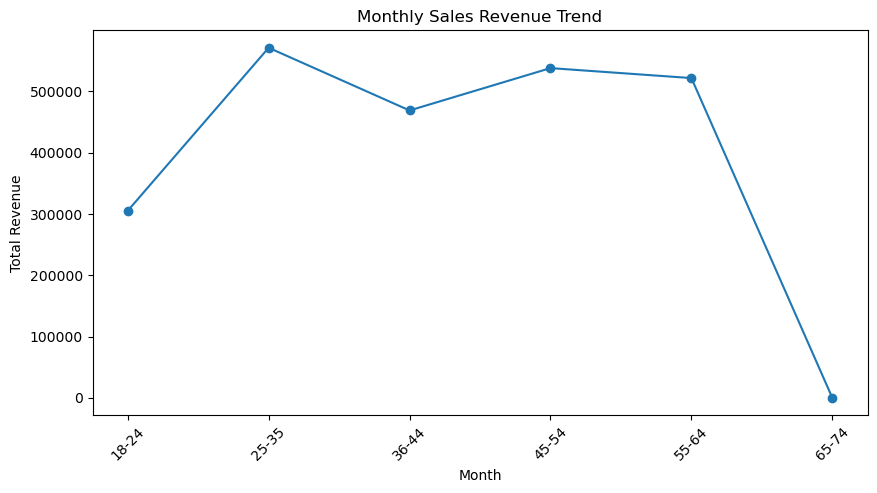

In [17]:
# Why do income levels and financial priorities differ by age group?
#Analyze Spending by Age Group
plt.figure(figsize=(10,5))
age_spending.plot(marker='o',linestyle='-')
plt.title("Monthly Sales Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

The 25-35 age group spends the most.

Younger people (18-24) have lower incomes, while mid-age groups (25-35) experience career growth, (36-44) Mid-Career Adults have family responsibilities, and older groups (45+) focus more on savings and healthcare

In [18]:
#Focusing on Age 25-35
df_25_35 = df[(df["Age"] >= 25) & (df["Age"] <= 35)]
category_spending_25_35 = df_25_35.groupby("ProductCategory")["TotalPrice"].sum().sort_values(ascending=False)
category_spending_25_35


ProductCategory
Clothing       154985.10
Electronics    144066.71
Grocery        136106.66
Toys            69701.33
Furniture       66490.16
Name: TotalPrice, dtype: float64

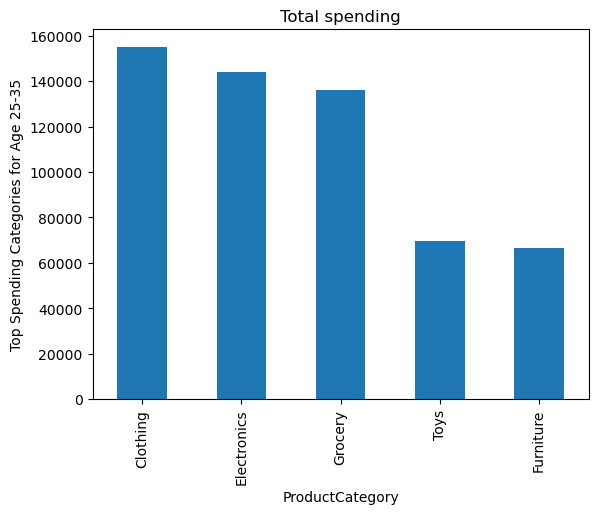

In [19]:
# Why do customers aged 25-35 spend the most?
#Plot Spending by Category for 25-35 Age Group
category_spending_25_35.plot(kind="bar")
plt.title("Total spending")
plt.xlabel("ProductCategory")
plt.ylabel("Top Spending Categories for Age 25-35")
plt.show()

the top three categories (likely Clothing, Electronics, and Grocery) dominate spending.

This suggests high demand for fashion, gadgets, and daily essentials among 25-35-year-olds.

In [20]:
#Analyze Payment Methods (Proxy for Digital Influence)
payment_spending_25_35 = df_25_35.groupby("PaymentMethod")["TotalPrice"].sum().sort_values(ascending=False)
payment_spending_25_35

PaymentMethod
Credit Card       246347.79
Cash              123495.60
Mobile Payment    113903.66
Debit Card         87602.91
Name: TotalPrice, dtype: float64

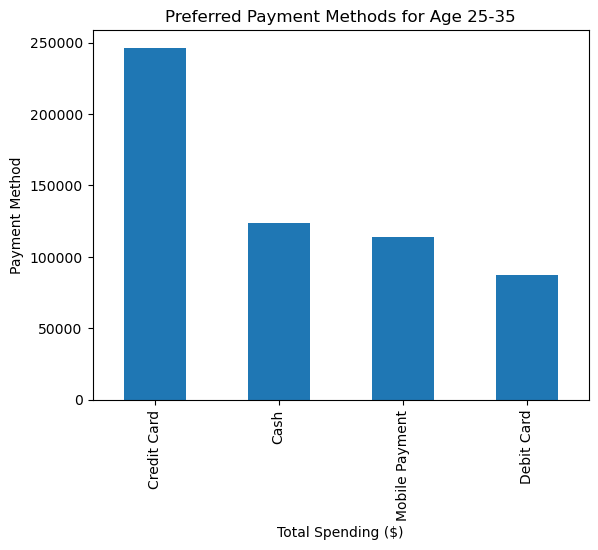

In [25]:
# Why does digital payment accessibility lead to higher spending?
payment_spending_25_35.plot(kind="bar")
plt.title("Preferred Payment Methods for Age 25-35")
plt.xlabel("Total Spending ($)")
plt.ylabel("Payment Method")
plt.show()

If Credit Card dominate, it suggests that this age group prefers cashless transactions.

If Cash is still significant, it indicates offline spending habits.

In [22]:
high_value_items = df_25_35[df_25_35["ProductCategory"].isin(["Clothing", "Electronics", "Grocery"])]

# Group by ProductCategory and sum the total spending
high_value_spending = high_value_items.groupby("ProductCategory")["TotalPrice"].sum().reset_index()


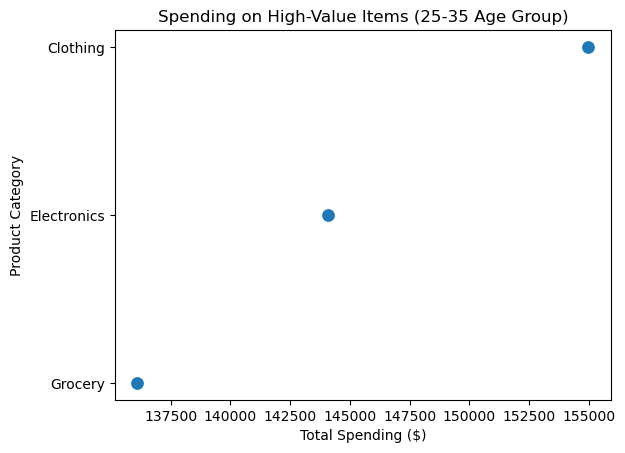

In [23]:
# Why do they purchase high-value items frequently?
#Plot the bar chart with x-axis as high-value categories and y-axis as spending
sns.scatterplot(x="TotalPrice", y="ProductCategory", data=high_value_spending,s=100)

plt.title("Spending on High-Value Items (25-35 Age Group)")
plt.xlabel("Total Spending ($)")
plt.ylabel("Product Category")
plt.show()

Clothing is the most preferred category for spending, likely due to frequent purchases and changing fashion trends.

Electronics is the second highest, possibly due to fewer but high-value purchases (like phones and laptops).

Grocery that while essential, customers might prefer premium products, organic items, or bulk purchases.

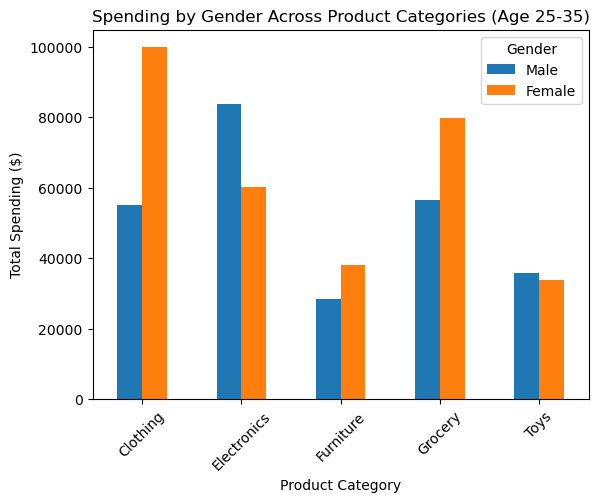

In [24]:
# Why does mid-career growth lead to higher spending?
# Group by Product Category and Gender to analyze spending
gender_product_spending_25_35 = df_25_35.groupby(["ProductCategory", "Gender"])["TotalPrice"].sum().unstack()

# Create a Grouped Bar Plot for Gender vs. Product Spending (for 25-35 age group)
gender_product_spending_25_35.plot(kind="bar", title="Spending by Gender Across Product Categories (Age 25-35)")
plt.xlabel("Product Category")
plt.ylabel("Total Spending ($)")
plt.legend(title="Gender", labels=["Male", "Female"])
plt.xticks(rotation=45)
plt.show()


Blue Bar (Male Spending): Represents total spending by males in that category.

Orange Bar (Female Spending): Represents total spending by females in that category.

With increased financial stability, they spend more on essential and lifestyle-based products rather than just necessities.

